In [1]:
library("tidyverse")
library("reshape2")

Warning message:
"package 'tidyverse' was built under R version 3.4.4"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
√ ggplot2 2.2.1     √ purrr   0.2.4
√ tibble  1.4.2     √ dplyr   0.7.4
√ tidyr   0.8.0     √ stringr 1.3.0
√ readr   1.1.1     √ forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths



In [63]:
taxa <- read.delim("Description_otu_table_L6.txt", sep='\t', row=1)
head(taxa)

,Korean,HMP
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter,0,2.352123e-06
k__Bacteria;p__;c__;o__;f__;g__,0,1.411274e-06
k__Bacteria;p__Acidobacteria;c__BPC102;o__B110;f__;g__,0,2.352123e-07
k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__;g__,0,4.704246e-07
k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__EB1017;g__,0,2.352123e-07
k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Microthrixaceae;g__Candidatus Microthrix,0,2.352123e-07


In [64]:
split <- strsplit(rownames(taxa),";")
head(rownames(taxa))

[1] "k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter"
[2] "k__Bacteria;p__;c__;o__;f__;g__"                                                                                  
[3] "k__Bacteria;p__Acidobacteria;c__BPC102;o__B110;f__;g__"                                                           
[4] "k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__;g__"                                      
[5] "k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__EB1017;g__"                                
[6] "k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Microthrixaceae;g__Candidatus Microthrix"

In [65]:
head(split)

[[1]]
[1] "k__Archaea"             "p__Euryarchaeota"       "c__Methanobacteria"    
[4] "o__Methanobacteriales"  "f__Methanobacteriaceae" "g__Methanobrevibacter" 

[[2]]
[1] "k__Bacteria" "p__"         "c__"         "o__"         "f__"        
[6] "g__"        

[[3]]
[1] "k__Bacteria"      "p__Acidobacteria" "c__BPC102"        "o__B110"         
[5] "f__"              "g__"             

[[4]]
[1] "k__Bacteria"         "p__Actinobacteria"   "c__Acidimicrobiia"  
[4] "o__Acidimicrobiales" "f__"                 "g__"                

[[5]]
[1] "k__Bacteria"         "p__Actinobacteria"   "c__Acidimicrobiia"  
[4] "o__Acidimicrobiales" "f__EB1017"           "g__"                

[[6]]
[1] "k__Bacteria"              "p__Actinobacteria"       
[3] "c__Acidimicrobiia"        "o__Acidimicrobiales"     
[5] "f__Microthrixaceae"       "g__Candidatus Microthrix"

In [66]:
head(taxa)

,Korean,HMP
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter,0,2.352123e-06
k__Bacteria;p__;c__;o__;f__;g__,0,1.411274e-06
k__Bacteria;p__Acidobacteria;c__BPC102;o__B110;f__;g__,0,2.352123e-07
k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__;g__,0,4.704246e-07
k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__EB1017;g__,0,2.352123e-07
k__Bacteria;p__Actinobacteria;c__Acidimicrobiia;o__Acidimicrobiales;f__Microthrixaceae;g__Candidatus Microthrix,0,2.352123e-07


In [67]:
taxaStrings <- sapply(split,function(x) paste(x[1:6],collapse=";"))
gtaxa <- taxa
splitg <- strsplit(rownames(gtaxa),";")                               # Split and rejoin on lv7
gtaxaStrings <- sapply(splitg,function(x) paste(x[1:6],collapse=";")) # level 7 is species, 8 is strain
gtaxa <- rowsum(gtaxa,gtaxaStrings)                                    # Collapse by taxonomy name
gtaxa <- sweep(gtaxa,2,colSums(gtaxa),'/')
gtaxa <- gtaxa[order(rowMeans(gtaxa),decreasing=T),]

In [68]:

filtered.taxa <- gtaxa * 100
etc <- gtaxa[gtaxa$Korean >= 0.01 & gtaxa$HMP >= 0.01,]
#filtered.taxa <- gtaxa * 100
#traspose to add to map for later use
etc <- t(etc)
colnames(etc) <- gsub(".*;g__?", "", colnames(etc))
colnames(etc) <- gsub("_", "", colnames(etc))
colnames(etc) <- gsub(";.*","",colnames(etc))

etc
class(etc)

,Bacteroides,Prevotella,,Faecalibacterium,,Parabacteroides,Sutterella,,,Dialister
Korean,0.4470093,0.21071548,0.03865312,0.04758593,0.02457201,0.01225104,0.02894322,0.01189357,0.01442304,0.02114887
HMP,0.4986539,0.03531337,0.06139982,0.02883327,0.04797696,0.04792192,0.02385759,0.03669641,0.02815186,0.01330384


[1] "matrix"

In [69]:
etc <- as.data.frame(etc)
etc$Others <-  1- rowSums(etc)
etc

,Bacteroides,Prevotella,V3,Faecalibacterium,V5,Parabacteroides,Sutterella,V8,V9,Dialister,Others
Korean,0.4470093,0.21071548,0.03865312,0.04758593,0.02457201,0.01225104,0.02894322,0.01189357,0.01442304,0.02114887,0.1428044
HMP,0.4986539,0.03531337,0.06139982,0.02883327,0.04797696,0.04792192,0.02385759,0.03669641,0.02815186,0.01330384,0.1778911


In [70]:
etc[, order(colnames(etc))]

,Bacteroides,Dialister,Faecalibacterium,Others,Parabacteroides,Prevotella,Sutterella,V3,V5,V8,V9
Korean,0.4470093,0.02114887,0.04758593,0.1428044,0.01225104,0.21071548,0.02894322,0.03865312,0.02457201,0.01189357,0.01442304
HMP,0.4986539,0.01330384,0.02883327,0.1778911,0.04792192,0.03531337,0.02385759,0.06139982,0.04797696,0.03669641,0.02815186


In [71]:
tmp <- etc[, order(colnames(etc))]
colnames(etc)
tmp <- t(etc)
head(etc)

[1] "Bacteroides"      "Prevotella"       "V3"               "Faecalibacterium"
 [5] "V5"               "Parabacteroides"  "Sutterella"       "V8"              
 [9] "V9"               "Dialister"        "Others"

,Bacteroides,Prevotella,V3,Faecalibacterium,V5,Parabacteroides,Sutterella,V8,V9,Dialister,Others
Korean,0.4470093,0.21071548,0.03865312,0.04758593,0.02457201,0.01225104,0.02894322,0.01189357,0.01442304,0.02114887,0.1428044
HMP,0.4986539,0.03531337,0.06139982,0.02883327,0.04797696,0.04792192,0.02385759,0.03669641,0.02815186,0.01330384,0.1778911


In [72]:
df <- melt(tmp, varnames=c("Genus", "Sample"), value.name="Proportion")
head(df)

Genus,Sample,Proportion
Bacteroides,Korean,0.44700932
Prevotella,Korean,0.21071548
V3,Korean,0.03865312
Faecalibacterium,Korean,0.04758593
V5,Korean,0.02457201
Parabacteroides,Korean,0.01225104


In [73]:
df %>% filter(Sample=="Korean") %>% select(Proportion) %>% sum
df %>% filter(Sample=="HMP") %>% select(Proportion) %>% sum

[1] 1

[1] 1

In [74]:
p <- ggplot(df) + geom_bar(aes(x=Sample, y=Proportion, fill=Genus), stat = "identity")

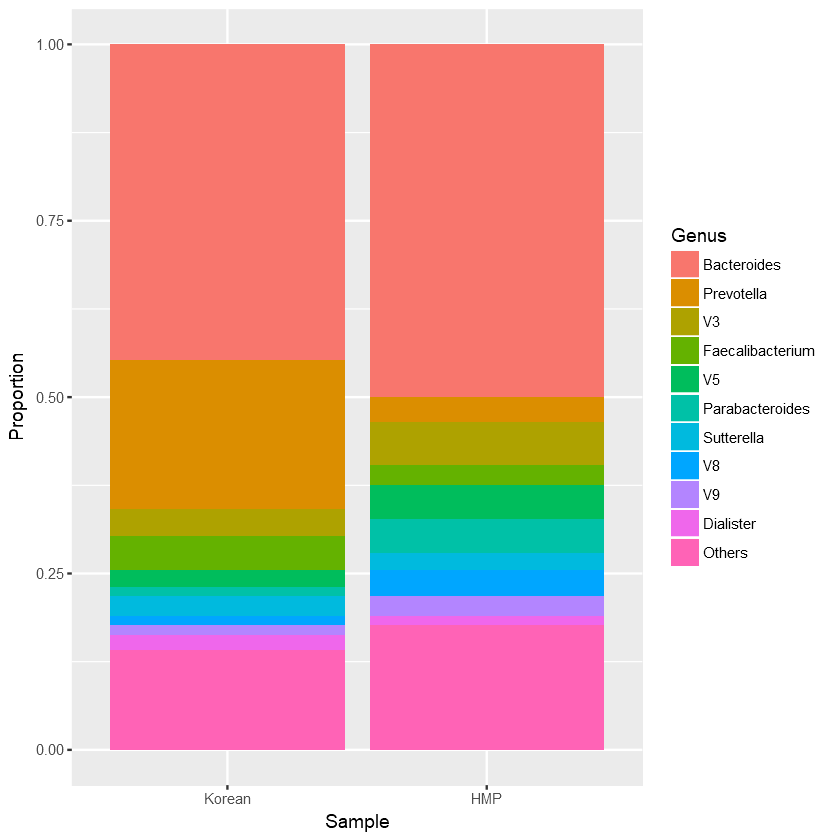

In [75]:
p

In [76]:
tmp

,Korean,HMP
Bacteroides,0.44700932,0.49865388
Prevotella,0.21071548,0.03531337
V3,0.03865312,0.06139982
Faecalibacterium,0.04758593,0.02883327
V5,0.02457201,0.04797696
Parabacteroides,0.01225104,0.04792192
Sutterella,0.02894322,0.02385759
V8,0.01189357,0.03669641
V9,0.01442304,0.02815186
Dialister,0.02114887,0.01330384


In [77]:
as.data.frame(tmp) %>% select(Korean) %>% sum

[1] 1

In [78]:
as.data.frame(tmp) %>% select(HMP) %>% sum

[1] 1

In [92]:
sth <- as.data.frame(tmp)
sth

,Korean,HMP
Bacteroides,0.44700932,0.49865388
Prevotella,0.21071548,0.03531337
Others1,0.03865312,0.06139982
Faecalibacterium,0.04758593,0.02883327
Others2,0.02457201,0.04797696
Parabacteroides,0.01225104,0.04792192
Sutterella,0.02894322,0.02385759
Others3,0.01189357,0.03669641
Others4,0.01442304,0.02815186
Dialister,0.02114887,0.01330384


In [18]:
glimpse(sth)

Observations: 10
Variables: 2
$ Korean <dbl> 0.44700932, 0.21071548, 0.03865312, 0.04758593, 0.02457201, ...
$ HMP    <dbl> 0.49865388, 0.03531337, 0.06139982, 0.02883327, 0.04797696, ...


In [80]:
head(tmp)

,Korean,HMP
Bacteroides,0.44700932,0.49865388
Prevotella,0.21071548,0.03531337
V3,0.03865312,0.06139982
Faecalibacterium,0.04758593,0.02883327
V5,0.02457201,0.04797696
Parabacteroides,0.01225104,0.04792192


In [81]:
row.names(tmp)

[1] "Bacteroides"      "Prevotella"       "V3"               "Faecalibacterium"
 [5] "V5"               "Parabacteroides"  "Sutterella"       "V8"              
 [9] "V9"               "Dialister"        "Others"

In [21]:
row.names.data.frame(tmp)

character(0)

In [82]:
row.names(tmp) <- c('Bacteroides','Prevotella', 'Others1', 'Faecalibacterium', 'Others2', 'Parabacteroides', 'Sutterella', 'Others3', 'Others4', 'Dialister', "Others5" )
tmp

,Korean,HMP
Bacteroides,0.44700932,0.49865388
Prevotella,0.21071548,0.03531337
Others1,0.03865312,0.06139982
Faecalibacterium,0.04758593,0.02883327
Others2,0.02457201,0.04797696
Parabacteroides,0.01225104,0.04792192
Sutterella,0.02894322,0.02385759
Others3,0.01189357,0.03669641
Others4,0.01442304,0.02815186
Dialister,0.02114887,0.01330384


In [83]:
tmp[c("etc1", "etc2", "etc3", "etc4"), ]

ERROR: Error in tmp[c("etc1", "etc2", "etc3", "etc4"), ]: 첨자의 허용 범위를 벗어났습니다


In [84]:
korea.others <- 1- as.data.frame(tmp) %>% select(Korean) %>% sum

In [85]:
hmp.others <- 1- as.data.frame(tmp) %>% select(HMP) %>% sum

In [87]:
tmp.etc <- tmp[c("Others1", "Others2", "Others3", "Others4", "Others5"), ]
head(tmp.etc)

,Korean,HMP
Others1,0.03865312,0.06139982
Others2,0.02457201,0.04797696
Others3,0.01189357,0.03669641
Others4,0.01442304,0.02815186
Others5,0.14280441,0.17789108


In [88]:
tmp <- as.data.frame(tmp)

In [89]:
korea.etc.final <- sum(tmp$Korean ) + korea.etc

In [90]:
hmp.etc.final <- sum(tmp$HMP ) + hmp.etc

In [91]:
final <- tmp
final

,Korean,HMP
Bacteroides,0.44700932,0.49865388
Prevotella,0.21071548,0.03531337
Others1,0.03865312,0.06139982
Faecalibacterium,0.04758593,0.02883327
Others2,0.02457201,0.04797696
Parabacteroides,0.01225104,0.04792192
Sutterella,0.02894322,0.02385759
Others3,0.01189357,0.03669641
Others4,0.01442304,0.02815186
Dialister,0.02114887,0.01330384


In [31]:
exclude.list <- c("etc1", 'etc2', 'etc3', 'etc4')

In [32]:
subset(final, rownames(final) %in% exclude.list)

,Korean,HMP
etc1,0.03865312,0.06139982
etc2,0.02457201,0.04797696
etc3,0.01189357,0.03669641
etc4,0.01442304,0.02815186


In [94]:
write.csv(final, "otu-final.csv")

In [95]:
df <- read.csv("otu-final.csv")
df$Korean <- df$Korean * 100
df$HMP <- df$HMP * 100
#df <- as.matrix(df)
#class(df)
#df
df

taxon,Korean,HMP
Bacteroides,44.700932,49.865388
Dialister,2.114887,1.330384
Faecalibacterium,4.758593,2.883327
Parabacteroides,1.225104,4.792192
Prevotella,21.071548,3.531337
Sutterella,2.894322,2.385759
Others,23.234615,35.211613


In [96]:
long <- melt(df, id=c("taxon"), varnames=c("Genus", "Sample"), value.name="Proportion")
colnames(long) <- c("Genus", "Sample", "Proportion")
head(long)

Genus,Sample,Proportion
Bacteroides,Korean,44.700932
Dialister,Korean,2.114887
Faecalibacterium,Korean,4.758593
Parabacteroides,Korean,1.225104
Prevotella,Korean,21.071548
Sutterella,Korean,2.894322


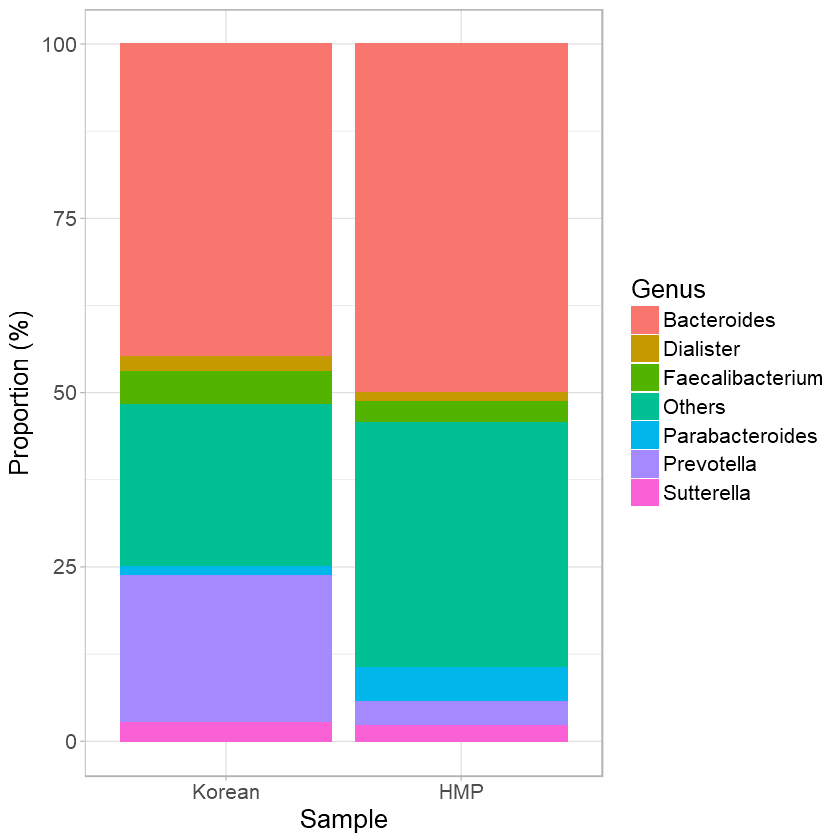

In [118]:
p <- ggplot(long) + geom_bar(aes(x=Sample, y=Proportion, fill=Genus), stat = "identity")+ theme_light() +
 ylab("Proportion (%)")  + theme(axis.title.y=element_text(size=15), axis.title.x=element_text(size=15)) +
theme(text=element_text(size=15)) 
p  
ggsave(paste0("Genus-plot",'.png'), width=10, height=10, units="cm")

In [50]:
taxaStrings <- sapply(split,function(x) paste(x[1:2],collapse=";"))
ptaxa <- taxa
splitg <- strsplit(rownames(ptaxa),";")                               # Split and rejoin on lv7
ptaxaStrings <- sapply(splitg,function(x) paste(x[1:2],collapse=";")) # level 7 is species, 8 is strain
ptaxa <- rowsum(ptaxa,ptaxaStrings)                                    # Collapse by taxonomy name
ptaxa <- sweep(ptaxa,2,colSums(ptaxa),'/')
ptaxa <- ptaxa[order(rowMeans(ptaxa),decreasing=T),]
ptaxa

,Korean,HMP
k__Bacteria;p__Bacteroidetes,7.031853e-01,6.637061e-01
k__Bacteria;p__Firmicutes,2.144961e-01,2.871862e-01
k__Bacteria;p__Proteobacteria,7.418618e-02,3.140743e-02
k__Bacteria;p__Tenericutes,1.126800e-03,6.417298e-03
k__Bacteria;p__Actinobacteria,2.140920e-03,5.380011e-03
k__Bacteria;p__Verrucomicrobia,3.224979e-03,4.149381e-03
k__Bacteria;p__Fusobacteria,1.468725e-03,3.481142e-04
k__Bacteria;p__Cyanobacteria,3.885517e-06,7.432709e-04
k__Bacteria;p__Lentisphaerae,1.359931e-04,5.788575e-04
k__Bacteria;p__Spirochaetes,2.719862e-05,3.057760e-06


In [55]:
p.filtered.taxa <- ptaxa * 100
etc.p <- ptaxa[ptaxa$Korean >= 0.01 & ptaxa$HMP >= 0.01,]
#filtered.taxa <- gtaxa * 100
#traspose to add to map for later use
etc.p <- t(etc.p)
colnames(etc.p) <- gsub(".*;p__?", "", colnames(etc.p))
colnames(etc.p) <- gsub("_", "", colnames(etc.p))
colnames(etc.p) <- gsub(";.*","",colnames(etc.p))

head(etc.p)

,Bacteroidetes,Firmicutes,Proteobacteria
Korean,0.7031853,0.2144961,0.07418618
HMP,0.6637061,0.2871862,0.03140743


In [56]:
etc.p <- as.data.frame(etc.p)
etc.p$Others <- 1- rowSums(etc.p)
etc.p <- as.matrix(etc.p)
etc.p


,Bacteroidetes,Firmicutes,Proteobacteria,Others
Korean,0.7031853,0.2144961,0.07418618,0.008132387
HMP,0.6637061,0.2871862,0.03140743,0.017700197


In [57]:
df.p <- melt(etc.p, varnames=c("Sample", "Phylum"), value.name="Proportion")
df.p$Proportion <- df.p$Proportion * 100
df.p

Sample,Phylum,Proportion
Korean,Bacteroidetes,70.3185347
HMP,Bacteroidetes,66.3706128
Korean,Firmicutes,21.4496087
HMP,Firmicutes,28.7186244
Korean,Proteobacteria,7.4186178
HMP,Proteobacteria,3.1407431
Korean,Others,0.8132387
HMP,Others,1.7700197


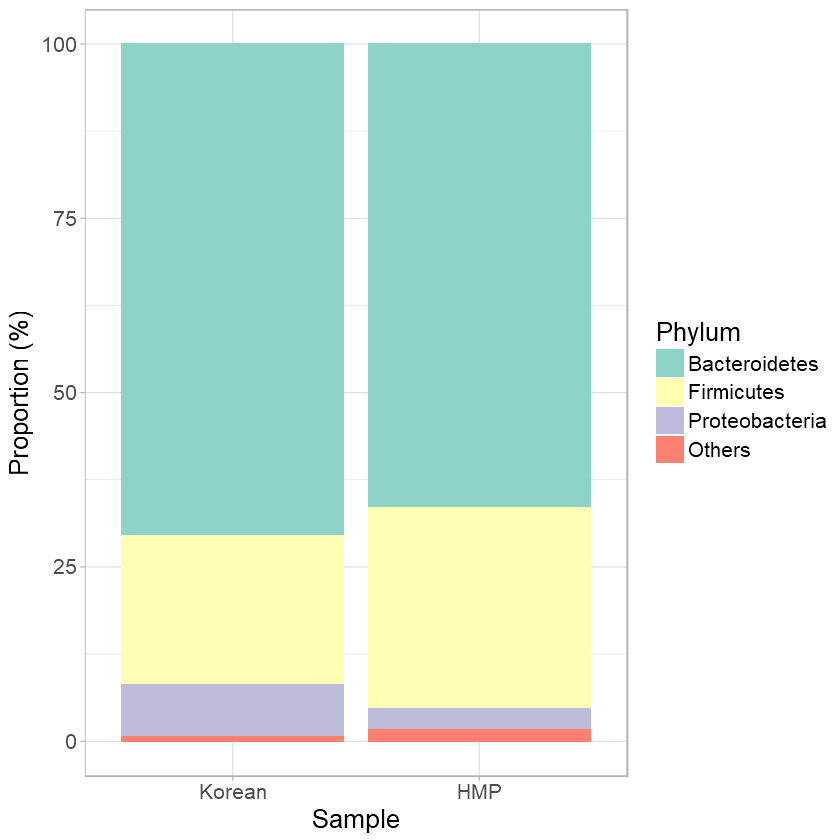

In [113]:
p <- ggplot(df.p) + geom_bar(aes(x=Sample, y=Proportion, fill=Phylum), stat = "identity") + theme_light() +
 ylab("Proportion (%)")  + theme(axis.title.y=element_text(size=15), axis.title.x=element_text(size=15)) +
theme(text=element_text(size=15)) + scale_fill_brewer(palette="Set3")
p  
s